In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 150
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn import metrics

In [3]:
pred_labels_df = pd.read_csv("complete_device_testing.csv")

pred_labels_df

,timestamp,win_std_dev,prediction
0,150,37.6532,0
1,644,338.9661,1
2,60644,515.4950,1
3,120644,490.0050,1
4,180644,395.6728,1
...,...,...,...
315,18840644,105.4248,0
316,18900644,112.4458,0
317,18960644,57.6903,0
318,19020644,39.8887,0


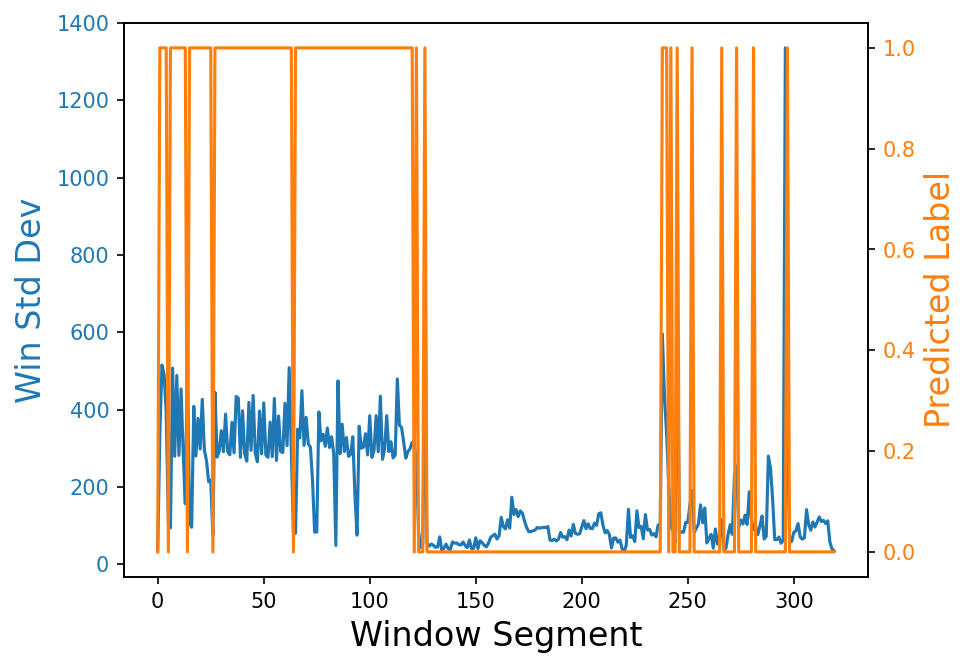

In [18]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Window Segment", fontsize=16)
ax1.set_ylabel("Win Std Dev", fontsize=16, color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

ax1.plot(pred_labels_df.index, pred_labels_df["win_std_dev"], color="tab:blue")

ax2 = ax1.twinx()

ax2.set_ylabel("Predicted Label", fontsize=16, color="tab:orange")
ax2.tick_params(axis='y', labelcolor="tab:orange")

ax2.plot(pred_labels_df.index, pred_labels_df["prediction"], color="tab:orange")

(0.0, 130.0)

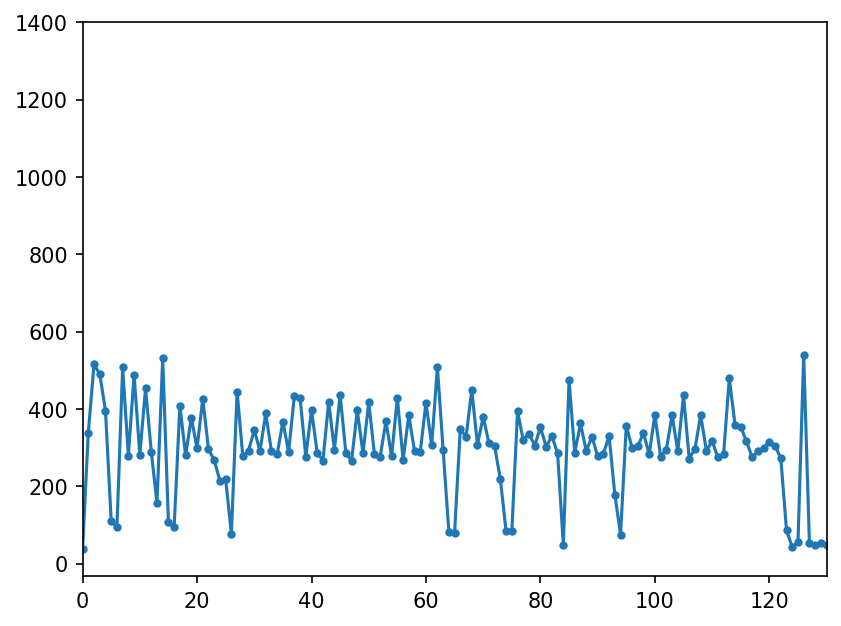

In [13]:
plt.plot(pred_labels_df.index, pred_labels_df["win_std_dev"], marker=".")
plt.xlim([0, 130])

In [15]:
labels = np.zeros(len(pred_labels_df))
labels[0 : 130] = 1.0

In [17]:
precision = metrics.precision_score(labels, pred_labels_df["prediction"])
recall = metrics.recall_score(labels, pred_labels_df["prediction"])
balanced = metrics.balanced_accuracy_score(labels, pred_labels_df["prediction"])

print("Precision: {:.1f}".format(100. * precision))
print("Recall: {:.1f}".format(100. * recall))
print("Balanced accuracy: {:.1f}".format(100. * balanced))
print(metrics.confusion_matrix(labels, pred_labels_df["prediction"]))

Precision: 92.2
Recall: 90.8
Balanced accuracy: 92.8
[[180  10]
 [ 12 118]]
